<a href="https://colab.research.google.com/github/yisuuum/practice/blob/main/try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#for Spliting Data and Hyperparameter Tuning 
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
#Importing Machine Learning Model
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from xgboost import XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor

In [ ]:
#statistical Tools
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
#To tranform data
from sklearn import preprocessing

In [ ]:
#Setting Format
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None
pd.options.display.max_rows = None
np.random.seed(100)

##Importing Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
data = pd.concat([train,test],ignore_index=True)
data.shape

(14204, 12)

In [ ]:
data.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15      9.30000          Low Fat          0.01605   
1           DRC01      5.92000          Regular          0.01928   
2           FDN15     17.50000          Low Fat          0.01676   
3           FDX07     19.20000          Regular          0.00000   
4           NCD19      8.93000          Low Fat          0.00000   
5           FDP36     10.39500          Regular          0.00000   
6           FDO10     13.65000          Regular          0.01274   
7           FDP10          nan          Low Fat          0.12747   
8           FDH17     16.20000          Regular          0.01669   
9           FDU28     19.20000          Regular          0.09445   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy 249.80920            OUT049   
1            Soft Drinks  48.26920            OUT018   
2                   Meat 141.61800            OUT049   
3  Fruits and Vegetables 182.09500            OUT010   
4              Household  53.86140            OUT013   
5           Baking Goods  51.40080            OUT018   
6            Snack Foods  57.65880            OUT013   
7            Snack Foods 107.76220            OUT027   
8           Frozen Foods  96.97260            OUT045   
9           Frozen Foods 187.82140            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1         3735.13800  
1  Supermarket Type2          443.42280  
2  Supermarket Type1         2097.27000  
3      Grocery Store          732.38000  
4  Supermarket Type1          994.70520  
5  Supermarket Type2          556.60880  
6  Supermarket Type1          343.55280  
7  Supermarket Type3         4022.76360  
8  Supermarket Type1         1076.59860  
9  Supermarket Type1         4710.53500

In [ ]:
data.tail(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
14194           FDA01     15.00000              reg          0.05446   
14195           NCH42      6.86000          Low Fat          0.03659   
14196           FDF46      7.07000          Low Fat          0.09405   
14197           DRL35     15.70000          Low Fat          0.03070   
14198           FDW46     13.00000          Regular          0.07041   
14199           FDB58     10.50000          Regular          0.01350   
14200           FDD47      7.60000          Regular          0.14299   
14201           NCO17     10.00000          Low Fat          0.07353   
14202           FDJ26     15.30000          Regular          0.00000   
14203           FDU37      9.50000          Regular          0.10472   

                Item_Type  Item_MRP Outlet_Identifier  \
14194              Canned  59.59040            OUT049   
14195           Household 231.10100            OUT049   
14196         Snack Foods 116.08340            OUT018   
14197         Hard Drinks  43.27700            OUT046   
14198         Snack Foods  63.44840            OUT049   
14199         Snack Foods 141.31540            OUT046   
14200       Starchy Foods 169.14480            OUT018   
14201  Health and Hygiene 118.74400            OUT045   
14202              Canned 214.62180            OUT017   
14203              Canned  79.79600            OUT045   

       Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
14194                       1999      Medium               Tier 1   
14195                       1999      Medium               Tier 1   
14196                       2009      Medium               Tier 3   
14197                       1997       Small               Tier 1   
14198                       1999      Medium               Tier 1   
14199                       1997       Small               Tier 1   
14200                       2009      Medium               Tier 3   
14201                       2002         NaN               Tier 2   
14202                       2007         NaN               Tier 2   
14203                       2002         NaN               Tier 2   

             Outlet_Type  Item_Outlet_Sales  
14194  Supermarket Type1                nan  
14195  Supermarket Type1                nan  
14196  Supermarket Type2                nan  
14197  Supermarket Type1                nan  
14198  Supermarket Type1                nan  
14199  Supermarket Type1                nan  
14200  Supermarket Type2                nan  
14201  Supermarket Type1                nan  
14202  Supermarket Type1                nan  
14203  Supermarket Type1                nan

##Exploring Data Analysis

- Item_Identifier : Unique product ID
- Item_Weight : Weight of product
- Item_Fat_Content : Whether the product is low fat or not
- Item_Visibility : The % of total display area of all products in a store allocated to the particular product
- Item_Type : The category to whoch the product belongd
- Item_MRP : Maximum Retail Price (list price) of the product
- Outlet_Identifier : Unique store ID
- Outlet_Establishment_Year : The year in which store was established
- Outlet_Size : The size of the store in terms of ground area covered
- Outlet_Location_Type : The type of city in which the store is located
- Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales : Sales of the product in the particular store. This is the outcome variable to be predicted.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [ ]:
data.describe(include = 'all')

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
count            14204  11765.00000            14204      14204.00000   
unique            1559          nan                5              nan   
top              NCO14          nan          Low Fat              nan   
freq                10          nan             8485              nan   
mean               NaN     12.79285              NaN          0.06595   
std                NaN      4.65250              NaN          0.05146   
min                NaN      4.55500              NaN          0.00000   
25%                NaN      8.71000              NaN          0.02704   
50%                NaN     12.60000              NaN          0.05402   
75%                NaN     16.75000              NaN          0.09404   
max                NaN     21.35000              NaN          0.32839   

                    Item_Type    Item_MRP Outlet_Identifier  \
count                   14204 14204.00000             14204   
unique                     16         nan                10   
top     Fruits and Vegetables         nan            OUT027   
freq                     2013         nan              1559   
mean                      NaN   141.00498               NaN   
std                       NaN    62.08694               NaN   
min                       NaN    31.29000               NaN   
25%                       NaN    94.01200               NaN   
50%                       NaN   142.24700               NaN   
75%                       NaN   185.85560               NaN   
max                       NaN   266.88840               NaN   

        Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
count                 14204.00000       10188                14204   
unique                        nan           3                    3   
top                           nan      Medium               Tier 3   
freq                          nan        4655                 5583   
mean                   1997.83068         NaN                  NaN   
std                       8.37166         NaN                  NaN   
min                    1985.00000         NaN                  NaN   
25%                    1987.00000         NaN                  NaN   
50%                    1999.00000         NaN                  NaN   
75%                    2004.00000         NaN                  NaN   
max                    2009.00000         NaN                  NaN   

              Outlet_Type  Item_Outlet_Sales  
count               14204         8523.00000  
unique                  4                nan  
top     Supermarket Type1                nan  
freq                 9294                nan  
mean                  NaN         2181.28891  
std                   NaN         1706.49962  
min                   NaN           33.29000  
25%                   NaN          834.24740  
50%                   NaN         1794.33100  
75%                   NaN         3101.29640  
max                   NaN        13086.96480

#### Analysis Each Data

**Item Outlet Sales (Target)**

In [ ]:
corr_matix = data.corr()
corr_matix['Item_Outlet_Sales']

Item_Weight                  0.01412
Item_Visibility             -0.12862
Item_MRP                     0.56757
Outlet_Establishment_Year   -0.04913
Item_Outlet_Sales            1.00000
Name: Item_Outlet_Sales, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


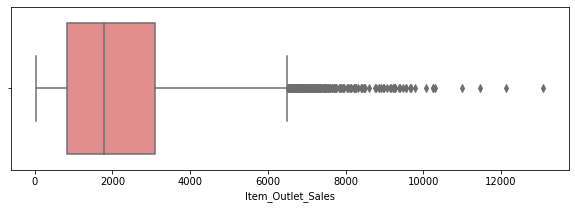

In [ ]:
plt.figure(figsize = (10, 3))
sns.boxplot(data.Item_Outlet_Sales, color = 'lightcoral')

######**Item**

**Item MRP**

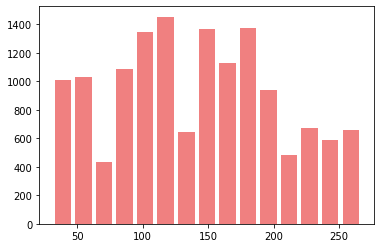

In [ ]:
plt.hist(data['Item_MRP'], bins = 15, rwidth = 0.8, color = 'lightcoral')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


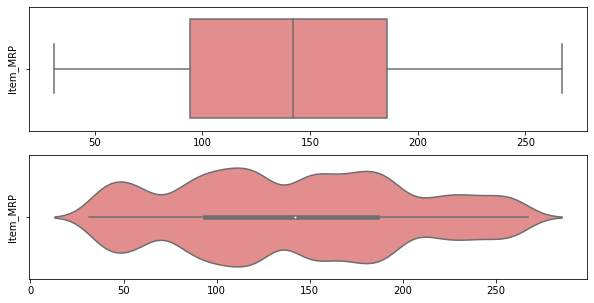

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
sns.boxplot(data['Item_MRP'], color = 'lightcoral')
plt.xlabel('')
plt.ylabel('Item_MRP')

plt.subplot(2, 1, 2)
sns.violinplot(data['Item_MRP'], color = 'lightcoral')
plt.xlabel('')
plt.ylabel('Item_MRP')

plt.show()

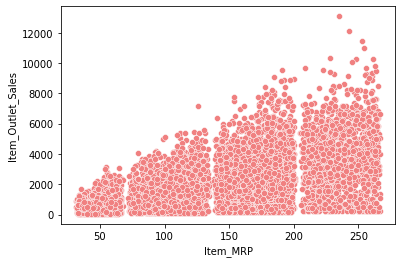

In [ ]:
sns.scatterplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_MRP', color = 'lightcoral')
plt.show()

In [ ]:
data['Item_MRP_cat'] = pd.cut(data.Item_MRP, bins = [25, 69, 137, 203, 270], labels = ['a', 'b', 'c', 'd'])

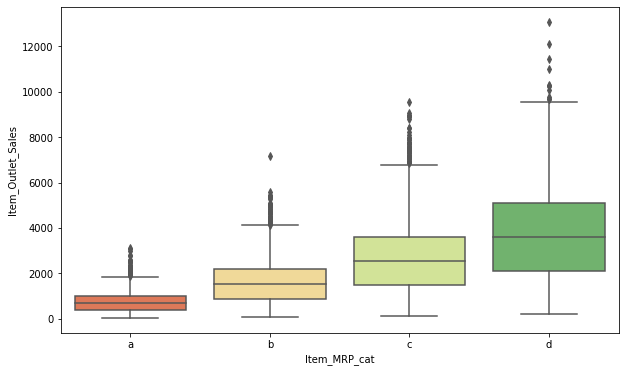

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_MRP_cat', palette = 'RdYlGn')
plt.show()

**Item Visibility**

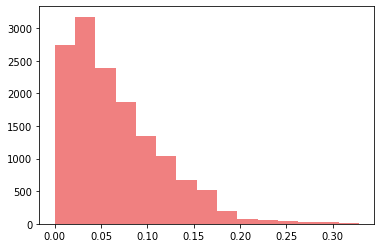

In [ ]:
plt.hist(data['Item_Visibility'], bins = 15, color = 'lightcoral')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


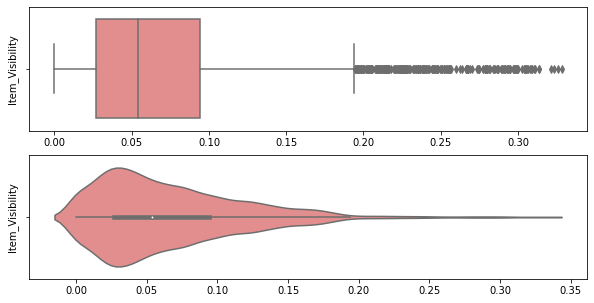

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
sns.boxplot(data['Item_Visibility'], color = 'lightcoral')
plt.xlabel('')
plt.ylabel('Item_Visibility')

plt.subplot(2, 1, 2)
sns.violinplot(data['Item_Visibility'], color = 'lightcoral')
plt.xlabel('')
plt.ylabel('Item_Visibility')

plt.show()

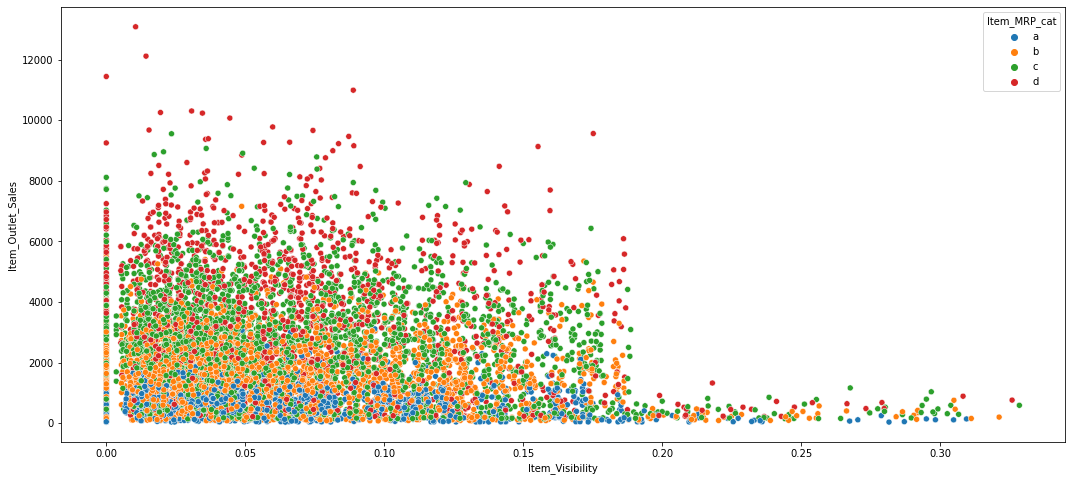

In [ ]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_Visibility', hue = 'Item_MRP_cat')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

**Item Weight**

In [ ]:
data['Item_Weight'].describe()

count   11765.00000
mean       12.79285
std         4.65250
min         4.55500
25%         8.71000
50%        12.60000
75%        16.75000
max        21.35000
Name: Item_Weight, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


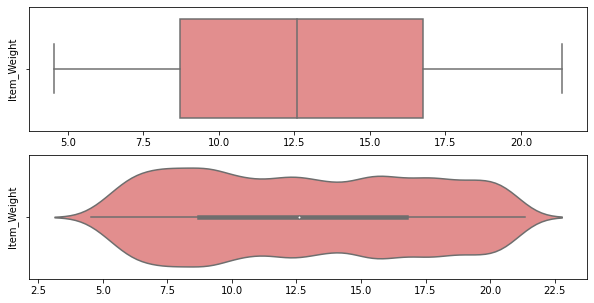

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(2, 1, 1)
sns.boxplot(data['Item_Weight'], color = 'lightcoral')
plt.xlabel('')
plt.ylabel('Item_Weight')

plt.subplot(2, 1, 2)
sns.violinplot(data['Item_Weight'], color = 'lightcoral')
plt.xlabel('')
plt.ylabel('Item_Weight')

plt.show()

**Item Identifier**

In [ ]:
data['Item_Identifier'].value_counts()

NCO14    10
FDT51    10
NCE07    10
FDB20    10
FDG46    10
FDX03    10
FDS40    10
FDS15    10
FDR19    10
FDW40    10
NCL17    10
FDN03    10
FDD45    10
NCI06    10
NCM54    10
FDW49    10
FDY58    10
FDR48    10
NCI30    10
FDM12    10
DRI11    10
DRB25    10
FDU38    10
FDH48    10
NCK31    10
DRN47    10
FDJ57    10
FDE36    10
DRH03    10
FDD17    10
NCZ30    10
NCU29    10
FDL52    10
FDO31    10
FDT32    10
FDS32    10
FDP59    10
DRL49    10
FDD51    10
NCV42    10
FDD47    10
NCC07    10
FDX43    10
DRH49    10
FDB14    10
NCE19    10
FDL14    10
FDX31    10
FDB38    10
FDA50    10
FDZ45    10
NCV41    10
FDH31    10
NCL19    10
FDT59    10
FDF21    10
FDU48    10
FDA28    10
NCO30    10
FDW39    10
FDL12    10
FDE09    10
FDN38    10
FDU28    10
NCV54    10
FDH21    10
FDX26    10
NCJ06    10
FDL13    10
DRA59    10
FDT19    10
FDY21    10
DRH37    10
FDD58    10
FDT39    10
FDC59    10
FDZ50    10
NCN41    10
NCO55    10
DRK35    10
FDF58    10
FDR33    10
FDX21    10
FDP1

In [ ]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Type_Combined, dtype: int64

In [ ]:
data.groupby(['Item_Type_Combined'])['Item_Type'].value_counts()

Item_Type_Combined  Item_Type            
DR                  Soft Drinks               726
                    Hard Drinks               362
                    Dairy                     229
FD                  Fruits and Vegetables    2013
                    Snack Foods              1989
                    Frozen Foods             1426
                    Baking Goods             1086
                    Canned                   1084
                    Dairy                     907
                    Meat                      736
                    Breads                    416
                    Starchy Foods             269
                    Breakfast                 186
                    Seafood                    89
NC                  Household                1548
                    Health and Hygiene        858
                    Others                    280
Name: Item_Type, dtype: int64

In [ ]:
data.pivot_table(values = 'Item_Outlet_Sales', index = ['Item_Type_Combined', 'Item_Type'], aggfunc = 'sum')

Item_Outlet_Sales
Item_Type_Combined Item_Type                               
DR                 Dairy                       245178.18680
                   Hard Drinks                 457793.42720
                   Soft Drinks                 892897.72200
FD                 Baking Goods               1265525.34220
                   Breads                      553237.18880
                   Breakfast                   232298.95160
                   Canned                     1444151.49260
                   Dairy                      1277415.86440
                   Frozen Foods               1825734.78860
                   Fruits and Vegetables      2820059.81680
                   Meat                        917565.61200
                   Seafood                     148868.21940
                   Snack Foods                2732786.08700
                   Starchy Foods               351401.25040
NC                 Health and Hygiene         1045200.13780
                   Household                  2055493.71320
                   Others                      325517.60960

In [ ]:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'DR':'Drink', 'NC':'Non-Consumable'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Combined, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


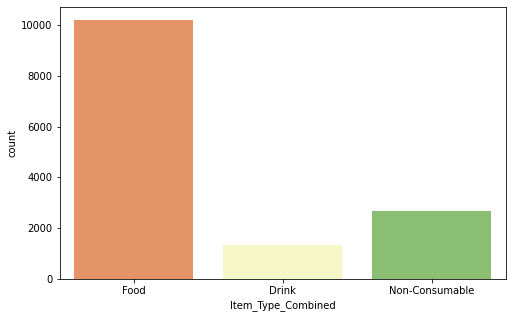

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(data['Item_Type_Combined'], palette = 'RdYlGn')
plt.show()

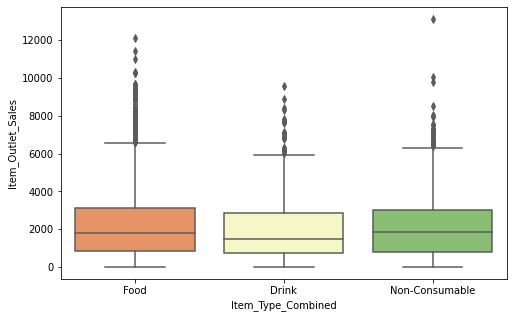

In [ ]:
plt.figure(figsize = (8, 5))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_Type_Combined',  palette = 'RdYlGn')
plt.show()

**Item Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


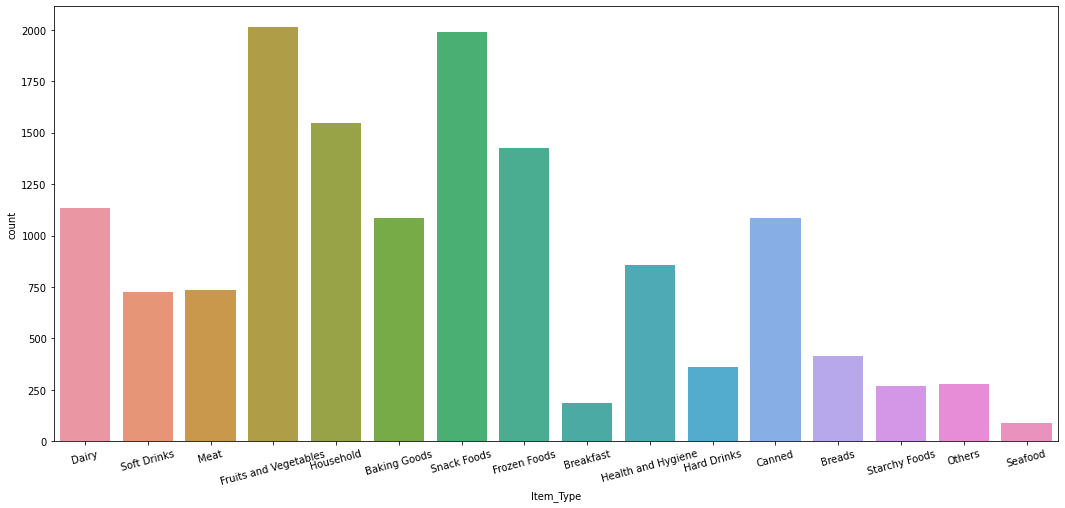

In [ ]:
plt.figure(figsize = (18, 8))
sns.countplot(data['Item_Type'])
plt.xticks(rotation = 15)
plt.show()

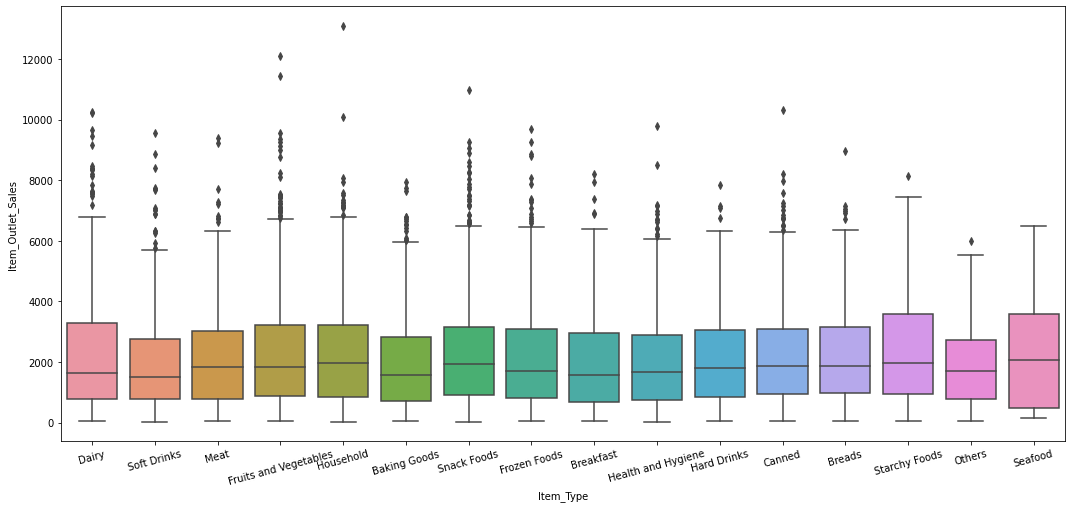

In [ ]:
plt.figure(figsize = (18, 8))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_Type')
plt.xticks(rotation = 15)
plt.show()

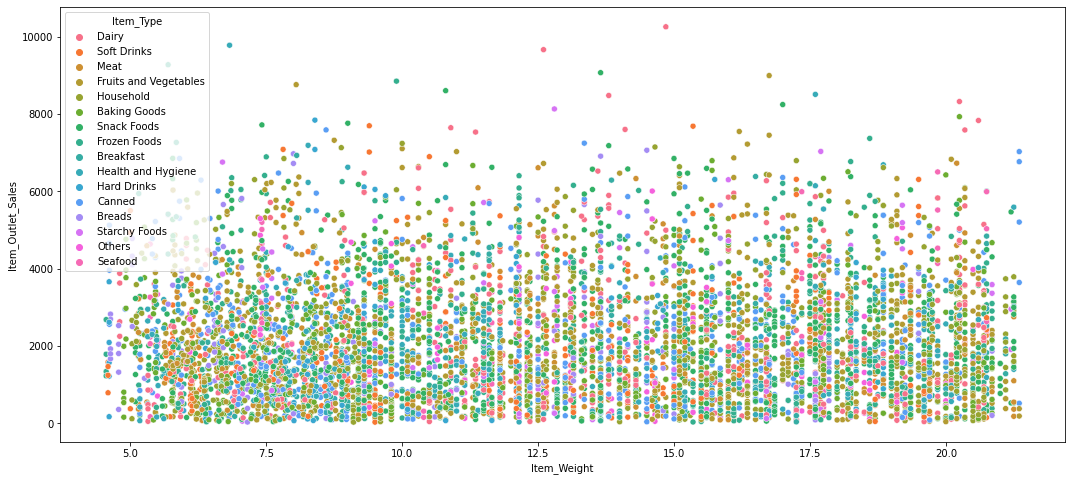

In [ ]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_Weight', hue = 'Item_Type')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

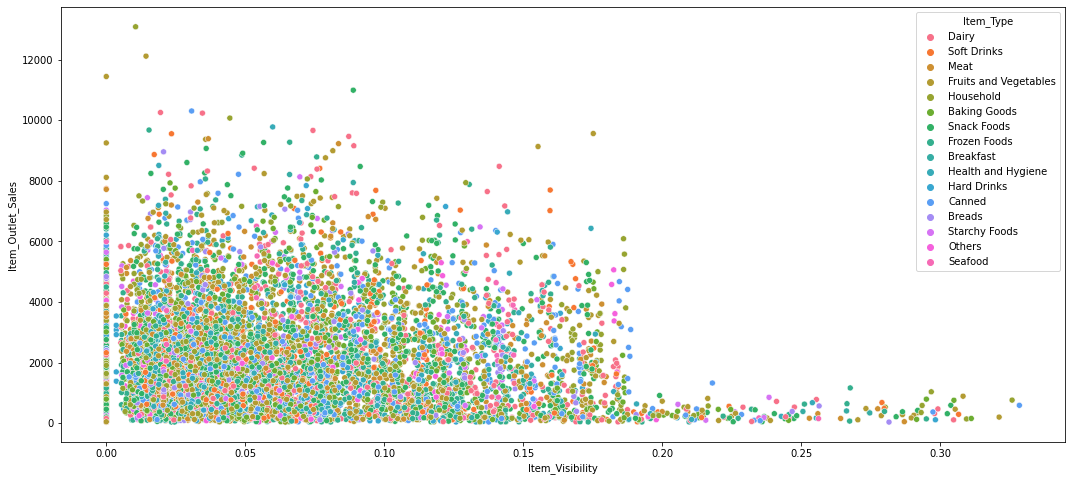

In [ ]:
plt.figure(figsize = (18, 8))
sns.scatterplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_Visibility', hue = 'Item_Type')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

**Item Fat Content**

In [ ]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [ ]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [ ]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('LF', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('reg', 'Regular')
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [ ]:
data.groupby(['Item_Fat_Content', 'Item_Type_Combined'])['Item_Type'].value_counts()

Item_Fat_Content  Item_Type_Combined  Item_Type            
Low Fat           Drink               Soft Drinks               617
                                      Hard Drinks               362
                                      Dairy                     229
                  Food                Snack Foods              1141
                                      Fruits and Vegetables    1086
                                      Frozen Foods              731
                                      Canned                    549
                                      Baking Goods              542
                                      Dairy                     462
                                      Meat                      282
                                      Breads                    222
                                      Starchy Foods             157
                                      Breakfast                  66
                                      Seafood           

In [ ]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Fat_Content Item_Type_Combined Item_Type                               
Low Fat          Drink              Dairy                       245178.18680
                                    Hard Drinks                 457793.42720
                                    Soft Drinks                 761259.07500
                 Food               Baking Goods                580523.67020
                                    Breads                      305680.76440
                                    Breakfast                    99441.89060
                                    Canned                      753171.60240
                                    Dairy                       651504.60820
                                    Frozen Foods                952890.96260
                                    Fruits and Vegetables      1374915.61640
                                    Meat                        346054.87640
                                    Seafood                      70588.11600
                                    Snack Foods                1669089.35940
                                    Starchy Foods               209790.91680
                 Non-Consumable     Health and Hygiene         1045200.13780
                                    Household                  2055493.71320
                                    Others                      325517.60960
Regular          Drink              Soft Drinks                 131638.64700
                 Food               Baking Goods                685001.67200
                                    Breads                      247556.42440
                                    Breakfast                   132857.06100
                                    Canned                      690979.89020
                                    Dairy                       625911.25620
                                    Frozen Foods                872843.82600
                                    Fruits and Vegetables      1445144.20040
                                    Meat                        571510.73560
                                    Seafood                      78280.10340
                                    Snack Foods                1063696.72760
                                    Starchy Foods               141610.33360

In [ ]:
data.loc[data['Item_Type_Combined'] == 'Non-Consumable', 'Item_Fat_Content'] = 'Others'

In [ ]:
data.groupby(['Item_Fat_Content', 'Item_Type_Combined'])['Item_Type'].value_counts()

Item_Fat_Content  Item_Type_Combined  Item_Type            
Low Fat           Drink               Soft Drinks               617
                                      Hard Drinks               362
                                      Dairy                     229
                  Food                Snack Foods              1141
                                      Fruits and Vegetables    1086
                                      Frozen Foods              731
                                      Canned                    549
                                      Baking Goods              542
                                      Dairy                     462
                                      Meat                      282
                                      Breads                    222
                                      Starchy Foods             157
                                      Breakfast                  66
                                      Seafood           

In [ ]:
data.pivot_table(values="Item_Outlet_Sales",index=['Item_Fat_Content','Item_Type_Combined','Item_Type'],aggfunc='sum')

Item_Outlet_Sales
Item_Fat_Content Item_Type_Combined Item_Type                               
Low Fat          Drink              Dairy                       245178.18680
                                    Hard Drinks                 457793.42720
                                    Soft Drinks                 761259.07500
                 Food               Baking Goods                580523.67020
                                    Breads                      305680.76440
                                    Breakfast                    99441.89060
                                    Canned                      753171.60240
                                    Dairy                       651504.60820
                                    Frozen Foods                952890.96260
                                    Fruits and Vegetables      1374915.61640
                                    Meat                        346054.87640
                                    Seafood                      70588.11600
                                    Snack Foods                1669089.35940
                                    Starchy Foods               209790.91680
Others           Non-Consumable     Health and Hygiene         1045200.13780
                                    Household                  2055493.71320
                                    Others                      325517.60960
Regular          Drink              Soft Drinks                 131638.64700
                 Food               Baking Goods                685001.67200
                                    Breads                      247556.42440
                                    Breakfast                   132857.06100
                                    Canned                      690979.89020
                                    Dairy                       625911.25620
                                    Frozen Foods                872843.82600
                                    Fruits and Vegetables      1445144.20040
                                    Meat                        571510.73560
                                    Seafood                      78280.10340
                                    Snack Foods                1063696.72760
                                    Starchy Foods               141610.33360

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


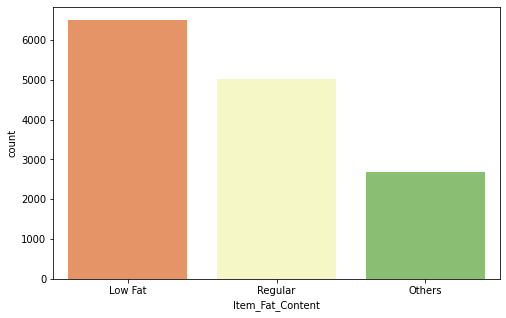

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(data['Item_Fat_Content'], palette = 'RdYlGn')
plt.show()

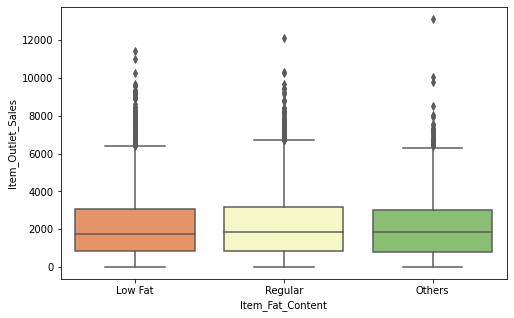

In [ ]:
plt.figure(figsize = (8, 5))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Item_Fat_Content',  palette = 'RdYlGn')
plt.show()

###### **Outlet**

**Outlet Establishment Year**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


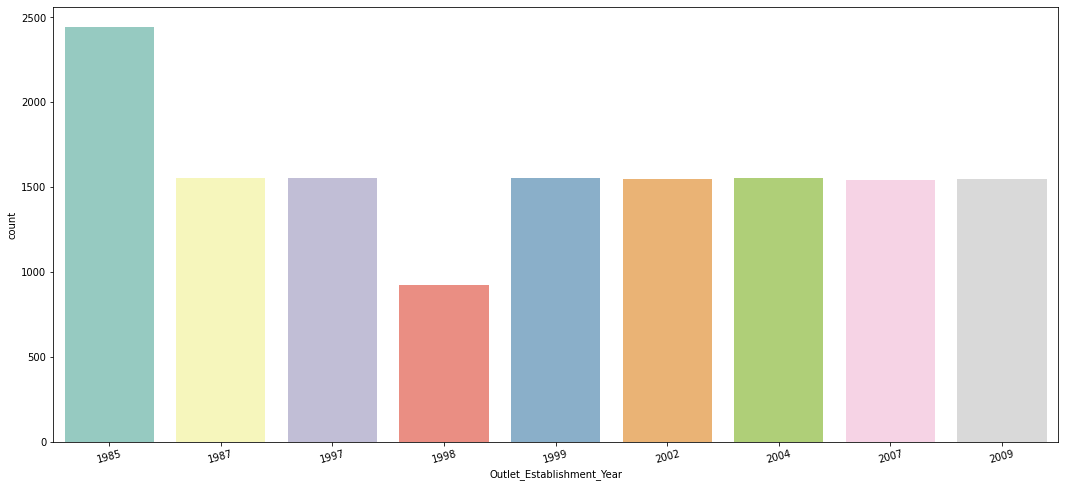

In [ ]:
plt.figure(figsize = (18, 8))
sns.countplot(data['Outlet_Establishment_Year'], palette = 'Set3')
plt.xticks(rotation = 15)
plt.show()

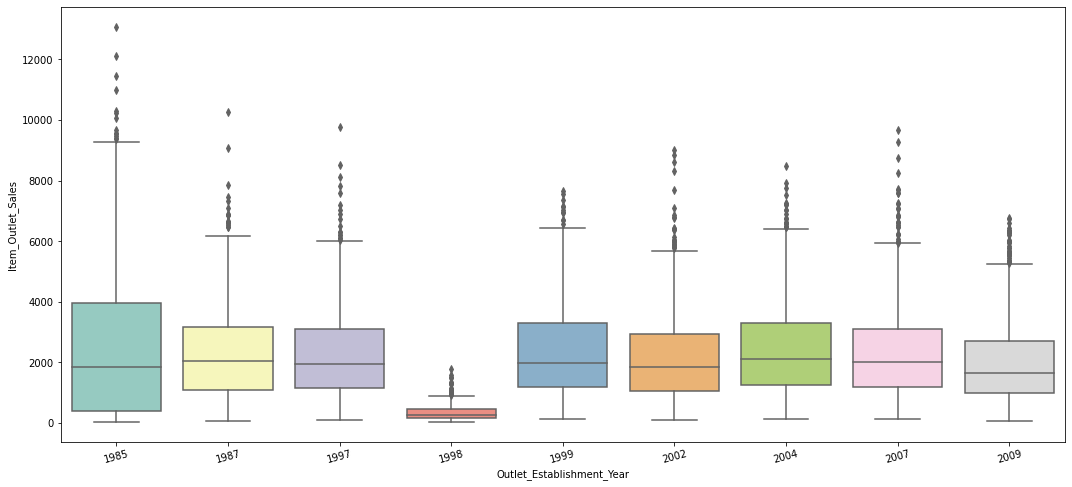

In [ ]:
plt.figure(figsize = (18, 8))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Outlet_Establishment_Year', palette = 'Set3')
plt.xticks(rotation = 15)
plt.show()

**Outlet Identifier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


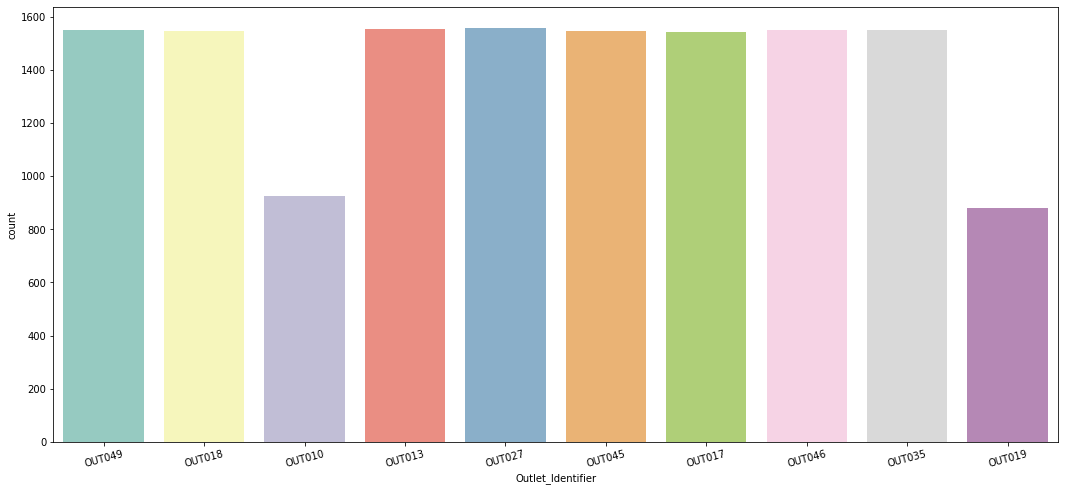

In [ ]:
plt.figure(figsize = (18, 8))
sns.countplot(data['Outlet_Identifier'], palette = 'Set3')
plt.xticks(rotation = 15)
plt.show()

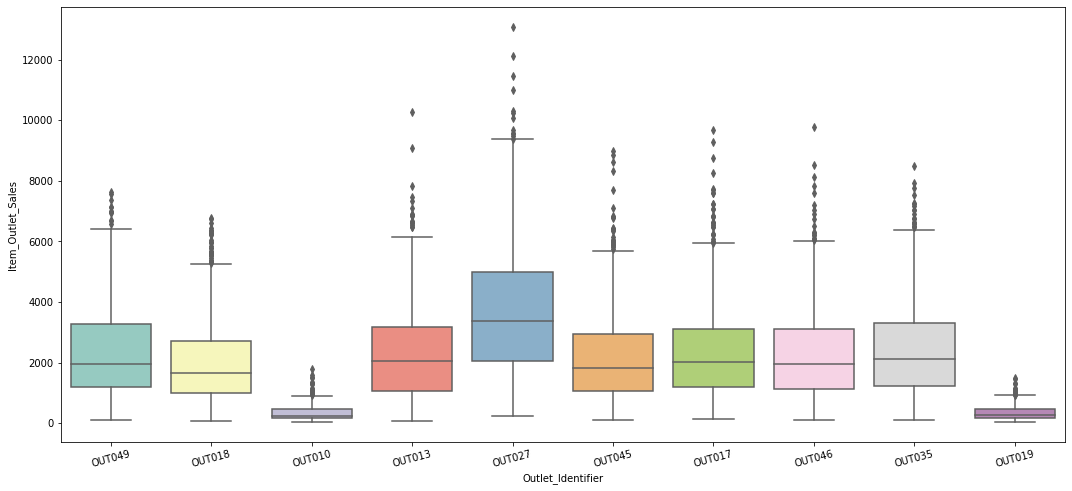

In [ ]:
plt.figure(figsize = (18, 8))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Outlet_Identifier', palette = 'Set3')
plt.xticks(rotation = 15)
plt.show()

**Outlet Size**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


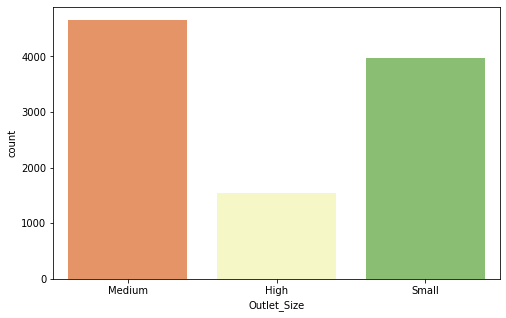

In [ ]:
plt.figure(figsize = (8, 5))
sns.countplot(data['Outlet_Size'], palette = 'RdYlGn')
plt.show()

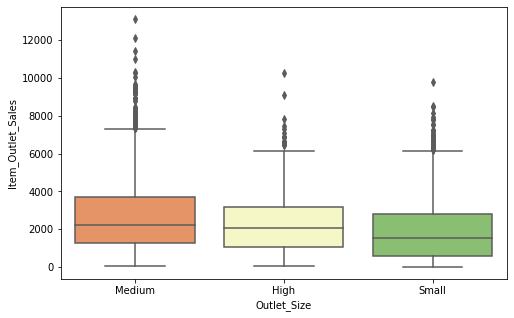

In [ ]:
plt.figure(figsize = (8, 5))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Outlet_Size', palette = 'RdYlGn')
plt.show()

**Outlet Location Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


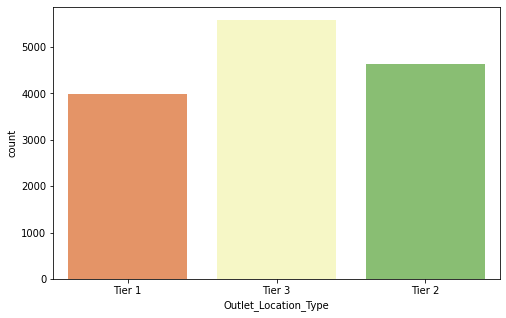

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data['Outlet_Location_Type'], palette = 'RdYlGn')
plt.show()

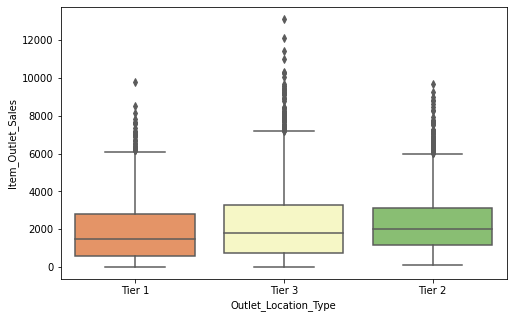

In [ ]:
plt.figure(figsize = (8, 5))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Outlet_Location_Type', palette = 'RdYlGn')
plt.show()

**Outlet Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


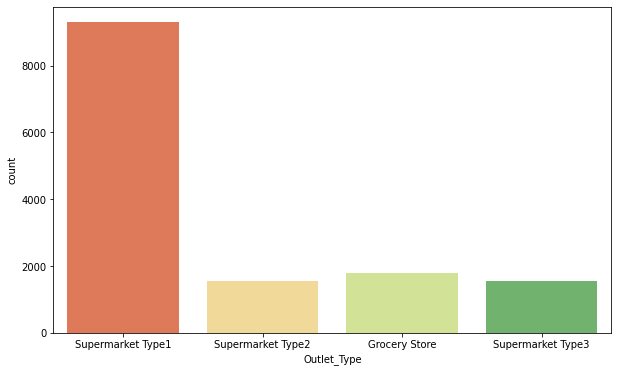

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data['Outlet_Type'], palette = 'RdYlGn')
plt.show()

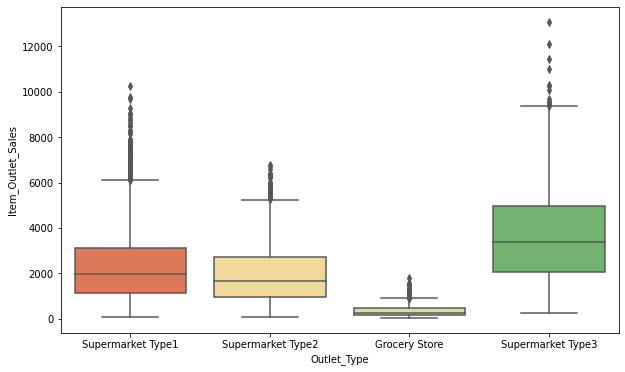

In [ ]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Outlet_Type', palette = 'RdYlGn')
plt.show()

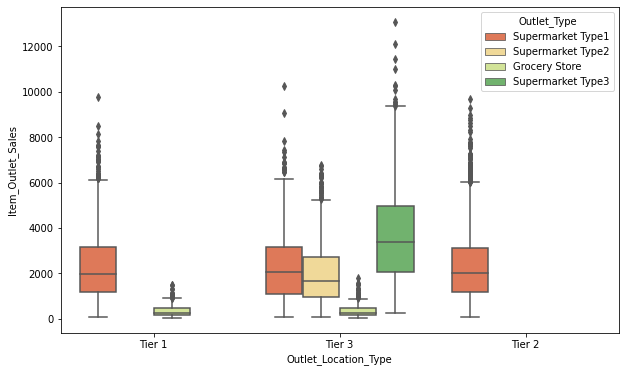

In [ ]:
fig,axes = plt.subplots(1, 1, figsize = (10, 6))
sns.boxplot(data = data, y = 'Item_Outlet_Sales', x = 'Outlet_Location_Type', hue = 'Outlet_Type', palette = 'RdYlGn')

####Finding Missing Values

In [ ]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_MRP_cat                    0
Item_Type_Combined              0
dtype: int64

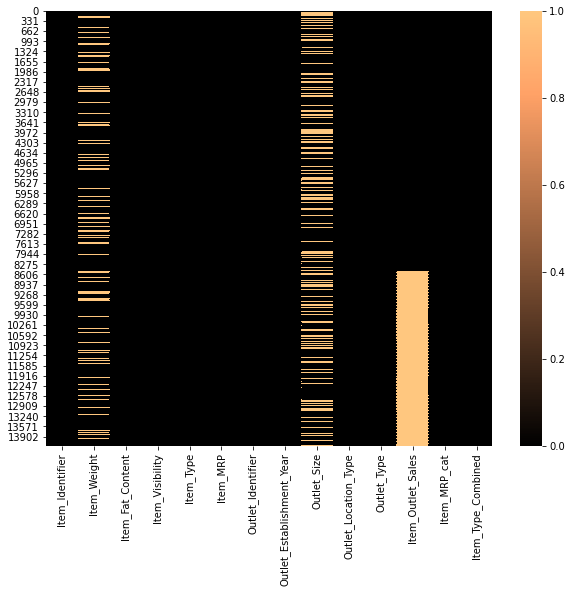

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.isna(), cmap = 'copper')

**Item Weight**

In [ ]:
data['Item_Weight'].fillna(data['Item_Weight'].mean(), inplace = True)

In [ ]:
data['Item_Weight'].isna().sum()

0

**Outlet Size**

In [ ]:
data[data.Outlet_Size.isna()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3               FDX07     19.20000          Regular          0.00000   
8               FDH17     16.20000          Regular          0.01669   
9               FDU28     19.20000          Regular          0.09445   
25              NCD06     13.00000           Others          0.09989   
28              FDE51      5.92500          Regular          0.16147   
30              FDV38     19.25000          Low Fat          0.17035   
33              FDO23     17.85000          Low Fat          0.00000   
45              FDM39      6.42000          Low Fat          0.08950   
46              NCP05     19.60000           Others          0.00000   
47              FDV49     10.00000          Low Fat          0.02588   
53              FDA43     10.89500          Low Fat          0.06504   
54              NCP18     12.15000           Others          0.02876   
56              NCX54      9.19500           Others          0.04816   
61              FDV27      7.97000          Regular          0.04007   
65              FDC46     17.70000          Low Fat          0.19507   
67              FDZ03     13.65000          Regular          0.07895   
68              DRH37     17.60000          Low Fat          0.04170   
72              FDH35     18.25000          Low Fat          0.00000   
73              FDG02      7.85500          Low Fat          0.01132   
78              FDL04     19.00000          Low Fat          0.11256   
79              FDV25      5.90500          Low Fat          0.00000   
85              FDG20     15.50000          Regular          0.12640   
90              FDW20     20.75000          Low Fat          0.04042   
92              DRI25     19.60000          Low Fat          0.03397   
100             FDT28     13.30000          Low Fat          0.06370   
107             FDG12      6.63500          Regular          0.00000   
111             FDS52      8.89000          Low Fat          0.00551   
114             FDV11      9.10000          Regular          0.00000   
116             FDZ16     16.85000          Regular          0.16076   
118             DRA12     11.60000          Low Fat          0.04118   
120             NCF19     13.00000           Others          0.03531   
121             DRJ13     12.65000          Low Fat          0.06302   
122             FDB14     20.25000          Regular          0.17194   
124             FDW11     12.60000          Low Fat          0.04906   
127             FDV38     19.25000          Low Fat          0.10235   
129             NCP30     20.50000           Others          0.03284   
133             FDS52      8.89000          Low Fat          0.00916   
137             FDB51      6.92000          Low Fat          0.03853   
138             FDX44      9.30000          Low Fat          0.04321   
139             NCN07     18.50000           Others          0.05682   
141             NCX54      9.19500           Others          0.04833   
142             NCO55     12.80000           Others          0.09122   
150             DRJ25     14.60000          Low Fat          0.15142   
157             FDN13     18.60000          Low Fat          0.15292   
158             DRD24     13.85000          Low Fat          0.03097   
165             DRL01     19.50000          Regular          0.07761   
166             FDP25     15.20000          Low Fat          0.02133   
171             FDK44     16.60000          Low Fat          0.12292   
174             FDI32     17.70000          Low Fat          0.29187   
175             FDR47     17.85000          Low Fat          0.00000   
176             FDB35     12.30000          Regular          0.06475   
177             NCU05     11.80000           Others          0.09831   
179             FDO24     11.10000          Low Fat          0.17657   
181             FDV39     11.30000          Low Fat          0.00729   
188             FDE04     19.75000          Re

In [ ]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small           880
                      Supermarket Type1  Medium         1550
                                         Small          1550
Tier 2                Supermarket Type1  Small          1550
Tier 3                Supermarket Type1  High           1553
                      Supermarket Type2  Medium         1546
                      Supermarket Type3  Medium         1559
Name: Outlet_Size, dtype: int64

In [ ]:
data.Outlet_Identifier.value_counts()

OUT027    1559
OUT013    1553
OUT035    1550
OUT049    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [ ]:
data.groupby(['Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Identifier
OUT010    188340.17240
OUT013   2142663.57820
OUT017   2167465.29400
OUT018   1851822.83000
OUT019    179694.09360
OUT027   3453926.05140
OUT035   2268122.93540
OUT045   2036725.47700
OUT046   2118395.16820
OUT049   2183969.81020
Name: Item_Outlet_Sales, dtype: float64

In [ ]:
data['Outlet_Size'] = data['Outlet_Size'].fillna('Not_specified')
data['Outlet_Size'].value_counts()

Medium           4655
Not_specified    4016
Small            3980
High             1553
Name: Outlet_Size, dtype: int64

In [ ]:
data.groupby(['Outlet_Location_Type','Outlet_Type', 'Outlet_Size', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Size    Outlet_Identifier
Tier 1                Grocery Store      Small          OUT019               179694.09360
                      Supermarket Type1  Medium         OUT049              2183969.81020
                                         Small          OUT046              2118395.16820
Tier 2                Supermarket Type1  Not_specified  OUT017              2167465.29400
                                                        OUT045              2036725.47700
                                         Small          OUT035              2268122.93540
Tier 3                Grocery Store      Not_specified  OUT010               188340.17240
                      Supermarket Type1  High           OUT013              2142663.57820
                      Supermarket Type2  Medium         OUT018              1851822.83000
                      Supermarket Type3  Medium         OUT027              3453926.05140
Name: Item_Outlet_Sales, d

In [ ]:
data.loc[data['Outlet_Identifier'] == 'OUT010','Outlet_Size'] = 'Small'

data.loc[data['Outlet_Identifier'] == 'OUT019','Outlet_Size'] = 'Small'

data.loc[data['Outlet_Identifier'] == 'OUT027','Outlet_Size'] = 'High'

data.loc[data['Outlet_Identifier'] == 'OUT017','Outlet_Size'] = 'High'

data.loc[data['Outlet_Identifier'] == 'OUT045','Outlet_Size'] = 'High'

data.loc[data['Outlet_Identifier'] == 'OUT035','Outlet_Size'] = 'Medium'

data.loc[data['Outlet_Identifier'] == 'OUT046','Outlet_Size'] = 'Medium'

In [ ]:
data.groupby(['Outlet_Location_Type','Outlet_Type', 'Outlet_Size', 'Outlet_Identifier'])['Item_Outlet_Sales'].sum()

Outlet_Location_Type  Outlet_Type        Outlet_Size  Outlet_Identifier
Tier 1                Grocery Store      Small        OUT019               179694.09360
                      Supermarket Type1  Medium       OUT046              2118395.16820
                                                      OUT049              2183969.81020
Tier 2                Supermarket Type1  High         OUT017              2167465.29400
                                                      OUT045              2036725.47700
                                         Medium       OUT035              2268122.93540
Tier 3                Grocery Store      Small        OUT010               188340.17240
                      Supermarket Type1  High         OUT013              2142663.57820
                      Supermarket Type2  Medium       OUT018              1851822.83000
                      Supermarket Type3  High         OUT027              3453926.05140
Name: Item_Outlet_Sales, dtype: float64

####Correlation



In [ ]:
data.corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                    1.00000         -0.01364   0.03300   
Item_Visibility               -0.01364          1.00000  -0.00635   
Item_MRP                       0.03300         -0.00635   1.00000   
Outlet_Establishment_Year      0.00046         -0.08368   0.00014   
Item_Outlet_Sales              0.01108         -0.12862   0.56757   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                  0.00046            0.01108  
Item_Visibility                             -0.08368           -0.12862  
Item_MRP                                     0.00014            0.56757  
Outlet_Establishment_Year                    1.00000           -0.04913  
Item_Outlet_Sales                           -0.04913            1.00000

Text(0.5, 1.0, 'Correlation')

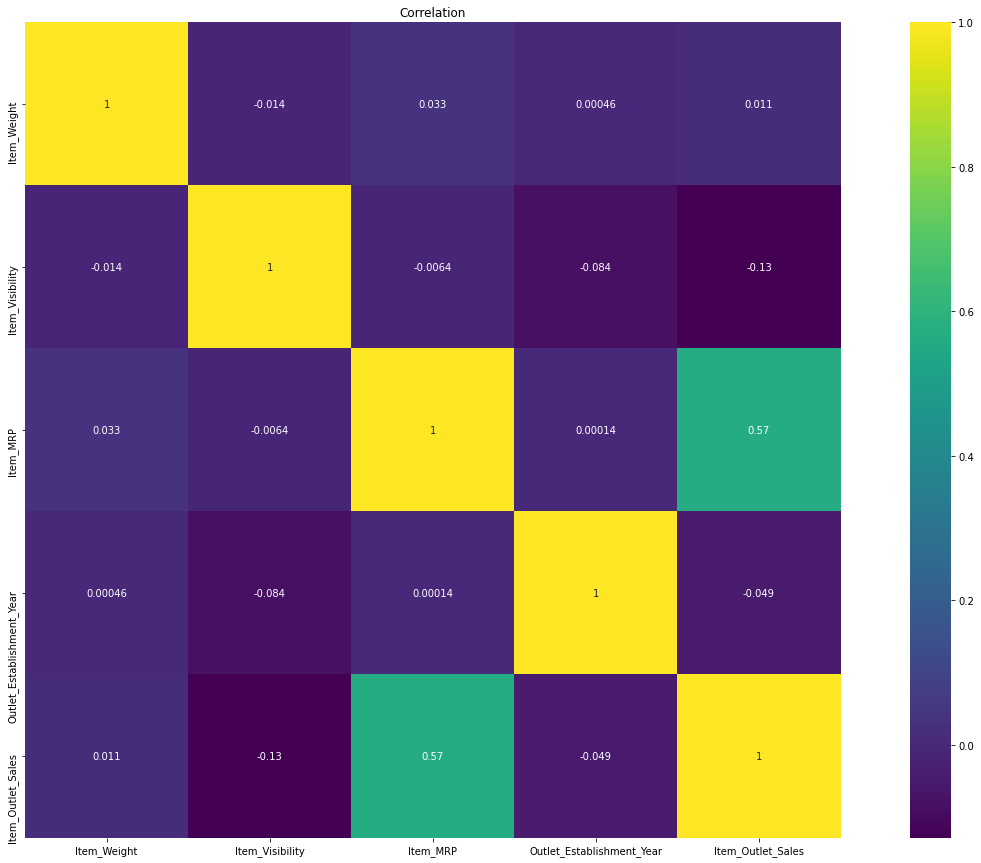

In [ ]:
plt.figure(figsize = (25,15))
sns.heatmap(data.corr(), vmax = 1, square = True, annot = True, cmap = 'viridis')
plt.title('Correlation')

####Transform Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  object  
 1   Item_Weight                14204 non-null  float64 
 2   Item_Fat_Content           14204 non-null  object  
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  object  
 5   Item_MRP                   14204 non-null  float64 
 6   Outlet_Identifier          14204 non-null  object  
 7   Outlet_Establishment_Year  14204 non-null  int64   
 8   Outlet_Size                14204 non-null  object  
 9   Outlet_Location_Type       14204 non-null  object  
 10  Outlet_Type                14204 non-null  object  
 11  Item_Outlet_Sales          8523 non-null   float64 
 12  Item_MRP_cat               14204 non-null  category
 13  Item_Type_Combined         1420

In [ ]:
data = data.drop(['Item_MRP', 'Item_Type_Combined'], axis = 1)

In [ ]:
data.Outlet_Establishment_Year = data.Outlet_Establishment_Year.astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            14204 non-null  object  
 1   Item_Weight                14204 non-null  float64 
 2   Item_Fat_Content           14204 non-null  object  
 3   Item_Visibility            14204 non-null  float64 
 4   Item_Type                  14204 non-null  object  
 5   Outlet_Identifier          14204 non-null  object  
 6   Outlet_Establishment_Year  14204 non-null  category
 7   Outlet_Size                14204 non-null  object  
 8   Outlet_Location_Type       14204 non-null  object  
 9   Outlet_Type                14204 non-null  object  
 10  Item_Outlet_Sales          8523 non-null   float64 
 11  Item_MRP_cat               14204 non-null  category
dtypes: category(2), float64(3), object(7)
memory usage: 1.1+ MB


In [ ]:
df_train = data.iloc[0:train.shape[0]]
df_test = data.iloc[train.shape[0]:]

In [ ]:
data.select_dtypes(include='float').columns

Index(['Item_Weight', 'Item_Visibility', 'Item_Outlet_Sales'], dtype='object')

In [ ]:
df_dummy = pd.get_dummies(data)

In [ ]:
df_train_dummy = df_dummy.iloc[0:train.shape[0]]
df_test_dummy = df_dummy.iloc[train.shape[0]:]

In [ ]:
df_train_dummy.shape

(8523, 1614)

In [ ]:
df_train_dummy.corr()['Item_Outlet_Sales']

Item_Weight                        0.01108
Item_Visibility                   -0.12862
Item_Outlet_Sales                  1.00000
Item_Identifier_DRA12             -0.00525
Item_Identifier_DRA24              0.00109
Item_Identifier_DRA59              0.00778
Item_Identifier_DRB01             -0.00729
Item_Identifier_DRB13              0.00351
Item_Identifier_DRB24              0.01104
Item_Identifier_DRB25             -0.00808
Item_Identifier_DRB48             -0.02618
Item_Identifier_DRC01             -0.02052
Item_Identifier_DRC12              0.00071
Item_Identifier_DRC13             -0.00697
Item_Identifier_DRC24              0.00872
Item_Identifier_DRC25             -0.01768
Item_Identifier_DRC27              0.00874
Item_Identifier_DRC36              0.01179
Item_Identifier_DRC49              0.00712
Item_Identifier_DRD01             -0.01889
Item_Identifier_DRD12             -0.01016
Item_Identifier_DRD13             -0.01594
Item_Identifier_DRD15              0.00574
Item_Identi

In [ ]:
df_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1614 entries, Item_Weight to Item_MRP_cat_d
dtypes: float64(3), uint8(1611)
memory usage: 13.3 MB


## Machine Learning Algorithms

####Sperating Train and Test

In [ ]:
df_x = df_train_dummy.drop(['Item_Outlet_Sales'], axis=1)
df_y = df_train_dummy['Item_Outlet_Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, train_size = 0.8, random_state = 10)

#### Applying Machine Learning Model

In [ ]:
lr = LinearRegression()

r = Ridge(alpha = 0.05,solver = 'cholesky')

l = Lasso(alpha = 0.01)

rfc = ensemble.RandomForestRegressor(n_estimators=400, bootstrap = True, min_samples_leaf = 100, min_samples_split = 8, max_depth = 6)

ada = ensemble.AdaBoostRegressor(n_estimators = 1000, learning_rate = 0.01)

gbr = ensemble.GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 1000, max_depth = 5, min_samples_split = 8, min_samples_leaf = 100)

xgb = XGBRFRegressor(n_jobs = -1, n_estimators = 1000, max_depth = 5)

dtr = DecisionTreeRegressor(max_depth = 15, min_samples_leaf = 100)

lgbr = LGBMRegressor(n_estimators = 440, learning_rate = 0.01, max_depth = 12, objective = 'tweedie', num_leaves = 15, num_threads = 4)

mlp = MLPRegressor()

svr = SVR(kernel = 'linear', C = 10, gamma = 'scale')

**Linear Regression**

In [ ]:
lr.fit(x_train, y_train)
predict_lr = lr.predict(x_test)
mse = mean_squared_error(y_test, predict_lr)
lr_score = np.sqrt(mse)
lr_score

7080768808665.529

**Ridge Regression**

In [ ]:
r.fit(x_train, y_train)
predict_r = r.predict(x_test)
mse = mean_squared_error(y_test, predict_r)
r_score = np.sqrt(mse)
r_score

1281.6797056848036

**Lasso Regression**

In [ ]:
l.fit(x_train, y_train)
predict_l = l.predict(x_test)
mse = mean_squared_error(y_test, predict_l)
l_score = np.sqrt(mse)
l_score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85352373.50125122, tolerance: 1975489.54081828
  positive)


1279.9078882412018

**Random Forest Regression**

In [ ]:
rfc.fit(x_train,y_train)
predict_rfc = rfc.predict(x_test)
mse = mean_squared_error(y_test, predict_rfc)
rfc_score = np.sqrt(mse)
rfc_score

1137.7456976627152

**Ada Boost**

In [ ]:
ada.fit(x_train,y_train)
predict_ada = ada.predict(x_test)
mse = mean_squared_error(y_test, predict_ada)
ada_score = np.sqrt(mse)
ada_score

1156.9669056041591

**Gradient Boost**

In [ ]:
gbr.fit(x_train,y_train)
predict_gbr = gbr.predict(x_test)
mse = mean_squared_error(y_test, predict_gbr)
gbr_score = np.sqrt(mse)
gbr_score

1102.2860870958596

**XGBoost**

In [ ]:
xgb.fit(x_train,y_train)
predict_xgb = xgb.predict(x_test)
mse = mean_squared_error(y_test, predict_xgb)
xgb_score = np.sqrt(mse)
xgb_score

[19:38:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


1104.8746345666777

**Decision Tree**

In [ ]:
dtr.fit(x_train,y_train)
predict_dtr = dtr.predict(x_test)
mse = mean_squared_error(y_test, predict_dtr)
dtr_score = np.sqrt(mse)
dtr_score

1112.611047840165

**LightGBM**

In [ ]:
lgbr.fit(x_train,y_train)
predict_lgbr = lgbr.predict(x_test)
mse = mean_squared_error(y_test, predict_lgbr)
lgbr_score = np.sqrt(mse)
lgbr_score

1105.1794844804033

**Multi-layer Perceptron**

In [ ]:
mlp.fit(x_train,y_train)
predict_mlp = mlp.predict(x_test)
mse = mean_squared_error(y_test, predict_mlp)
mlp_score = np.sqrt(mse)
mlp_score

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1131.5916068219656

**Support Vector Machine**

In [ ]:
svr.fit(x_train,y_train)
predict_svr = svr.predict(x_test)
mse = mean_squared_error(y_test, predict_svr)
svr_score = np.sqrt(mse)
svr_score

1193.5218095158773

####HyperParameter Tuning

Using Gradient Boosting Regression

In [ ]:
gb = ensemble.GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 1000, max_depth = 5, min_samples_split = 8, min_samples_leaf = 100)
param=[{'min_samples_split':[5,9,13],'max_leaf_nodes':[3,5,7,9],'max_features':[8,10,15,18]}]

gs = GridSearchCV(gb, param, cv = 5, scoring = 'neg_mean_squared_error')

gs.fit(df_x, df_y)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=100,
                                                 min_samples_split=8,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000,
                                                 n_it...ne,
                         

In [ ]:
gs.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=18, max_leaf_nodes=7,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=100, min_samples_split=13,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
gb=gs.best_estimator_

####Train Model

In [ ]:
df_y.shape, df_x.shape

((8523,), (8523, 1613))

In [ ]:
gb.fit(df_x, df_y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=5,
                          max_features=18, max_leaf_nodes=7,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=100, min_samples_split=13,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

##Predict Sales

####Test Data

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 8523 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Identifier            5681 non-null   object  
 1   Item_Weight                5681 non-null   float64 
 2   Item_Fat_Content           5681 non-null   object  
 3   Item_Visibility            5681 non-null   float64 
 4   Item_Type                  5681 non-null   object  
 5   Outlet_Identifier          5681 non-null   object  
 6   Outlet_Establishment_Year  5681 non-null   category
 7   Outlet_Size                5681 non-null   object  
 8   Outlet_Location_Type       5681 non-null   object  
 9   Outlet_Type                5681 non-null   object  
 10  Item_Outlet_Sales          0 non-null      float64 
 11  Item_MRP_cat               5681 non-null   category
dtypes: category(2), float64(3), object(7)
memory usage: 455.6+ KB


In [ ]:
df_test.drop(['Item_Outlet_Sales'], axis = 1, inplace = True)
df_test.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_test_dummy.drop(['Item_Outlet_Sales'], axis = 1, inplace = True)
df_test_dummy.reset_index(drop = True, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_test_dummy.shape

(5681, 1613)

####Predict Sales

In [ ]:
df_test['Item_Outlet_Sales'] = gb.predict(df_test_dummy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_test.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58     20.75000          Low Fat          0.00756  Snack Foods   
1           FDW14      8.30000          Regular          0.03843        Dairy   
2           NCN55     14.60000           Others          0.09957       Others   
3           FDQ58      7.31500          Low Fat          0.01539  Snack Foods   
4           FDY38     12.79285          Regular          0.11860        Dairy   

  Outlet_Identifier Outlet_Establishment_Year Outlet_Size  \
0            OUT049                      1999      Medium   
1            OUT017                      2007        High   
2            OUT010                      1998       Small   
3            OUT017                      2007        High   
4            OUT027                      1985        High   

  Outlet_Location_Type        Outlet_Type Item_MRP_cat  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1            b         2109.90728  
1               Tier 2  Supermarket Type1            b         2164.01984  
2               Tier 3      Grocery Store            d         1526.90426  
3               Tier 2  Supermarket Type1            c         2425.49823  
4               Tier 3  Supermarket Type3            d         3119.29818

In [ ]:
df_test.to_csv('Predicted_sales.csv', index = None)

In [ ]:
submission = ['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales']

In [ ]:
submission = df_test[submission]
submission.head()

Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049         2109.90728
1           FDW14            OUT017         2164.01984
2           NCN55            OUT010         1526.90426
3           FDQ58            OUT017         2425.49823
4           FDY38            OUT027         3119.29818

In [ ]:
submission.to_csv('submission.csv', index = None)